<a href="https://colab.research.google.com/github/karrin10/Introduction-to-Deep-Learning/blob/Homework-1/HW1_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Problem 1A - - - - - - - - - - - - - - - - - - - - - - - - - - - -  -- - - - -
# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load CIFAR-10 dataset with normalization
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model
class CIFAR10Net(nn.Module):
    def __init__(self):
        super(CIFAR10Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 512)  # Image size is 32 by 32 with 3 channels for RGB
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 10) # 10 output classes in CIFAR-10

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return x

model = CIFAR10Net().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
loss_values = []
training_accuracy = []
validation_accuracy = []
total_start_time = time.time()

for epoch in range(num_epochs):
    start_time = time.time()
    running_loss = 0.0
    training_correct = 0
    training_total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        training_total += labels.size(0)
        training_correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    # Calculate training time
    end_time = time.time()
    training_time = end_time - start_time

    loss_values.append(running_loss / len(train_loader))
    training_accuracy.append(training_correct / training_total)

    # Training statistics
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Training Time: {training_time:.2f} seconds')

    # Total training time
    total_end_time = time.time()
    total_training_time = total_end_time - total_start_time
    print(f'Total Training Time: {total_training_time:.2f} seconds')

    # Testing the model
    model.eval()
    val_correct = 0
    val_total = 0
    all_predicted = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            all_predicted.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Update validation accuracy
    validation_accuracy.append(val_correct / val_total)

    # Set the model back to training mode
    model.train()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 2.055059443806748, Training Time: 26.25 seconds
Total Training Time: 26.25 seconds
Epoch 2/20, Loss: 1.715380553546769, Training Time: 15.57 seconds
Total Training Time: 44.97 seconds
Epoch 3/20, Loss: 1.5805854364429288, Training Time: 15.95 seconds
Total Training Time: 63.23 seconds
Epoch 4/20, Loss: 1.4838194368440476, Training Time: 15.48 seconds
Total Training Time: 80.99 seconds
Epoch 5/20, Loss: 1.4088288481583071, Training Time: 15.75 seconds
Total Training Time: 99.19 seconds
Epoch 6/20, Loss: 1.343232025118435, Training Time: 16.30 seconds
Total Training Time: 117.76 seconds
Epoch 7/20, Loss: 1.2865573008499487, Training Time: 15.37 seconds
Total Training Time: 135.45 seconds
Epoch 8/20, Loss: 1.2370449508852361, Training Time: 16.60 seconds
Total Training Time: 154.30 seconds
Epoch 9/20, Loss: 1.1887420096513255, Training Time: 15.47 seconds
Tot

Final Training Loss: 0.7591352905230144


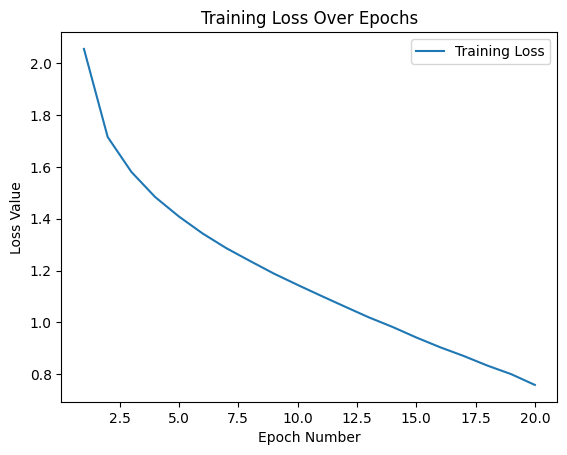

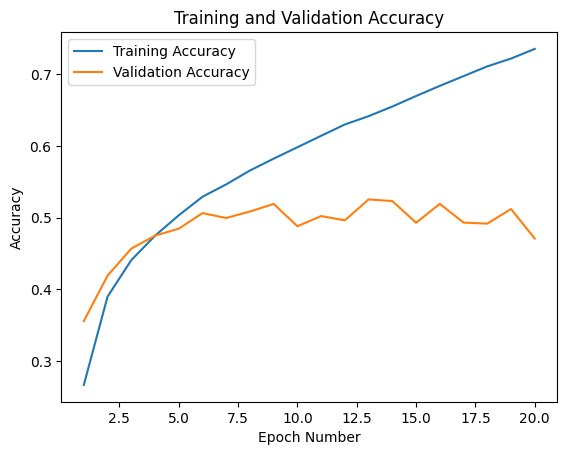

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      1000
           1       0.52      0.72      0.60      1000
           2       0.45      0.36      0.40      1000
           3       0.31      0.50      0.38      1000
           4       0.38      0.31      0.34      1000
           5       0.45      0.35      0.40      1000
           6       0.59      0.54      0.57      1000
           7       0.69      0.45      0.55      1000
           8       0.42      0.78      0.55      1000
           9       0.53      0.26      0.35      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



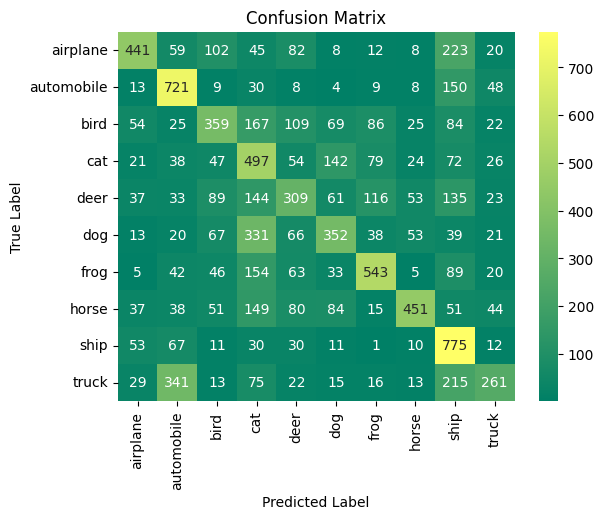

In [19]:
print(f'Final Training Loss: {loss_values[-1]}')
epochs_range = range(1, num_epochs + 1)

# Plot Training Loss
plt.plot(epochs_range, loss_values, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(true_labels, all_predicted)
report = classification_report(true_labels, all_predicted)
print(report)

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='summer', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [4]:
# Problem 1B - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Load CIFAR-10 dataset to calculate mean and std
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
imgs = torch.stack([img_t for img_t, _ in train_dataset], dim=3)
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load CIFAR-10 dataset with normalization
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model
class CIFAR10DeepNet(nn.Module):
    def __init__(self):
        super(CIFAR10DeepNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 1024)  # Image size is 32 by 32 with 3 channels for RGB
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(256, 128) # 10 output classes in CIFAR-10
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model
model = CIFAR10DeepNet().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
loss_values = []
training_accuracy = []
validation_accuracy = []
total_start_time = time.time()

for epoch in range(num_epochs):
    start_time = time.time()
    running_loss = 0.0
    training_correct = 0
    training_total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        training_total += labels.size(0)
        training_correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    # Calculate training time
    end_time = time.time()
    training_time = end_time - start_time

    loss_values.append(running_loss / len(train_loader))
    training_accuracy.append(training_correct / training_total)

    # Print training statistics
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Training Time: {training_time:.2f} seconds')

    # Print total training time
    total_end_time = time.time()
    total_training_time = total_end_time - total_start_time
    print(f'Total Training Time: {total_training_time:.2f} seconds')

    # Testing the model
    model.eval()
    val_correct = 0
    val_total = 0
    all_predicted = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            all_predicted.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Update validation accuracy
    validation_accuracy.append(val_correct / val_total)

    # Set the model back to training mode
    model.train()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 2.1931397991107247, Training Time: 25.37 seconds
Total Training Time: 25.38 seconds
Epoch 2/20, Loss: 1.8643775804878195, Training Time: 24.04 seconds
Total Training Time: 52.47 seconds
Epoch 3/20, Loss: 1.6707156553597706, Training Time: 23.22 seconds
Total Training Time: 78.57 seconds
Epoch 4/20, Loss: 1.5493437577696407, Training Time: 23.18 seconds
Total Training Time: 105.02 seconds
Epoch 5/20, Loss: 1.4553889397465054, Training Time: 23.24 seconds
Total Training Time: 131.13 seconds
Epoch 6/20, Loss: 1.380555034598426, Training Time: 23.08 seconds
Total Training Time: 157.11 seconds
Epoch 7/20, Loss: 1.3149598028958607, Training Time: 22.97 seconds
Total Training Time: 183.32 seconds
Epoch 8/20, Loss: 1.2574743163555175, Training Time: 23.06 seconds
Total Training Time: 209.29 seconds
Epoch 9/20, Loss: 1.1997794662137775, Training Time: 23.18 seconds

Final Training Loss: 0.7591352905230144


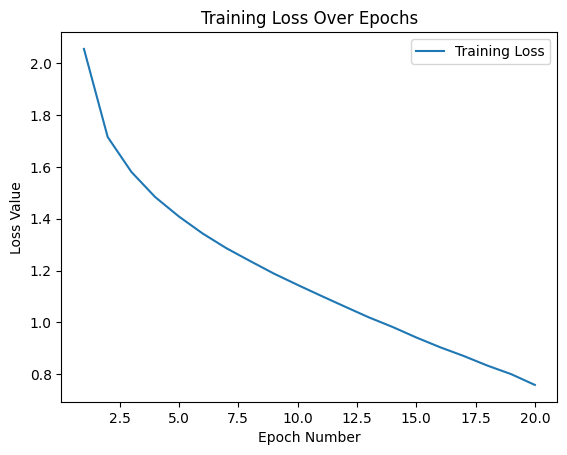

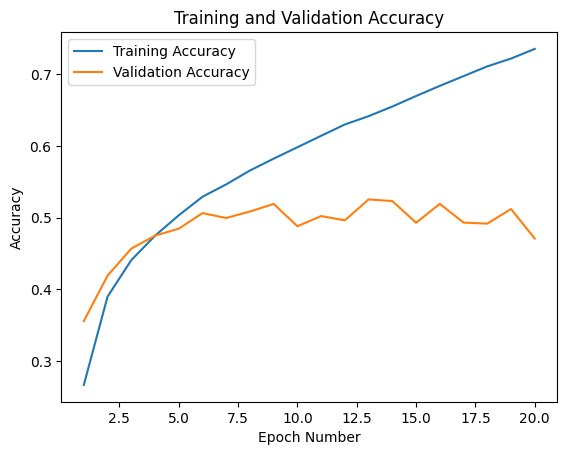

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      1000
           1       0.52      0.72      0.60      1000
           2       0.45      0.36      0.40      1000
           3       0.31      0.50      0.38      1000
           4       0.38      0.31      0.34      1000
           5       0.45      0.35      0.40      1000
           6       0.59      0.54      0.57      1000
           7       0.69      0.45      0.55      1000
           8       0.42      0.78      0.55      1000
           9       0.53      0.26      0.35      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



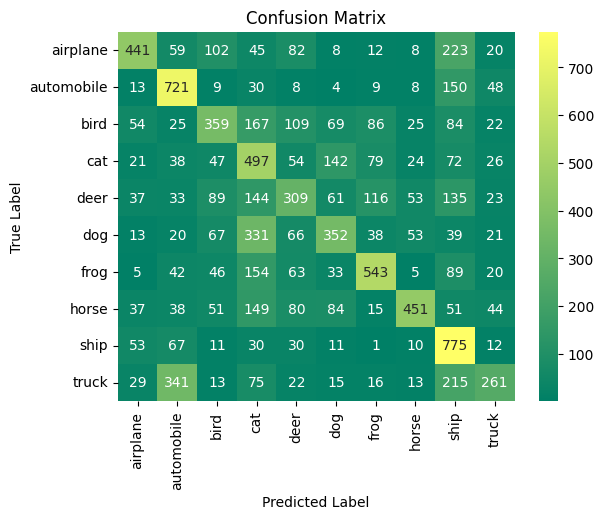

In [20]:
print(f'Final Training Loss: {loss_values[-1]}')
epochs_range = range(1, num_epochs + 1)

# Plot Training Loss
plt.plot(epochs_range, loss_values, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(true_labels, all_predicted)
report = classification_report(true_labels, all_predicted)
print(report)

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix using seaborn
#plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='summer', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()